In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-and-safety-dataset/crime_safety_dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/crime-and-safety-dataset/crime_safety_dataset.csv")
df.head()

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
0,1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other
1,2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black
2,3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian
3,4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian
4,5,2023-07-19,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26,Other,Other


In [3]:
df.shape

(1000, 10)

In [4]:
df.columns

Index(['id', 'date', 'time', 'crime_type', 'city', 'state',
       'location_description', 'victim_age', 'victim_gender', 'victim_race'],
      dtype='object')

In [5]:
df.dtypes

id                       int64
date                    object
time                    object
crime_type              object
city                    object
state                   object
location_description    object
victim_age               int64
victim_gender           object
victim_race             object
dtype: object

In [6]:
df.head()

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
0,1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other
1,2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black
2,3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian
3,4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian
4,5,2023-07-19,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26,Other,Other


In [7]:
df.isnull().sum()

id                      0
date                    0
time                    0
crime_type              0
city                    0
state                   0
location_description    0
victim_age              0
victim_gender           0
victim_race             0
dtype: int64

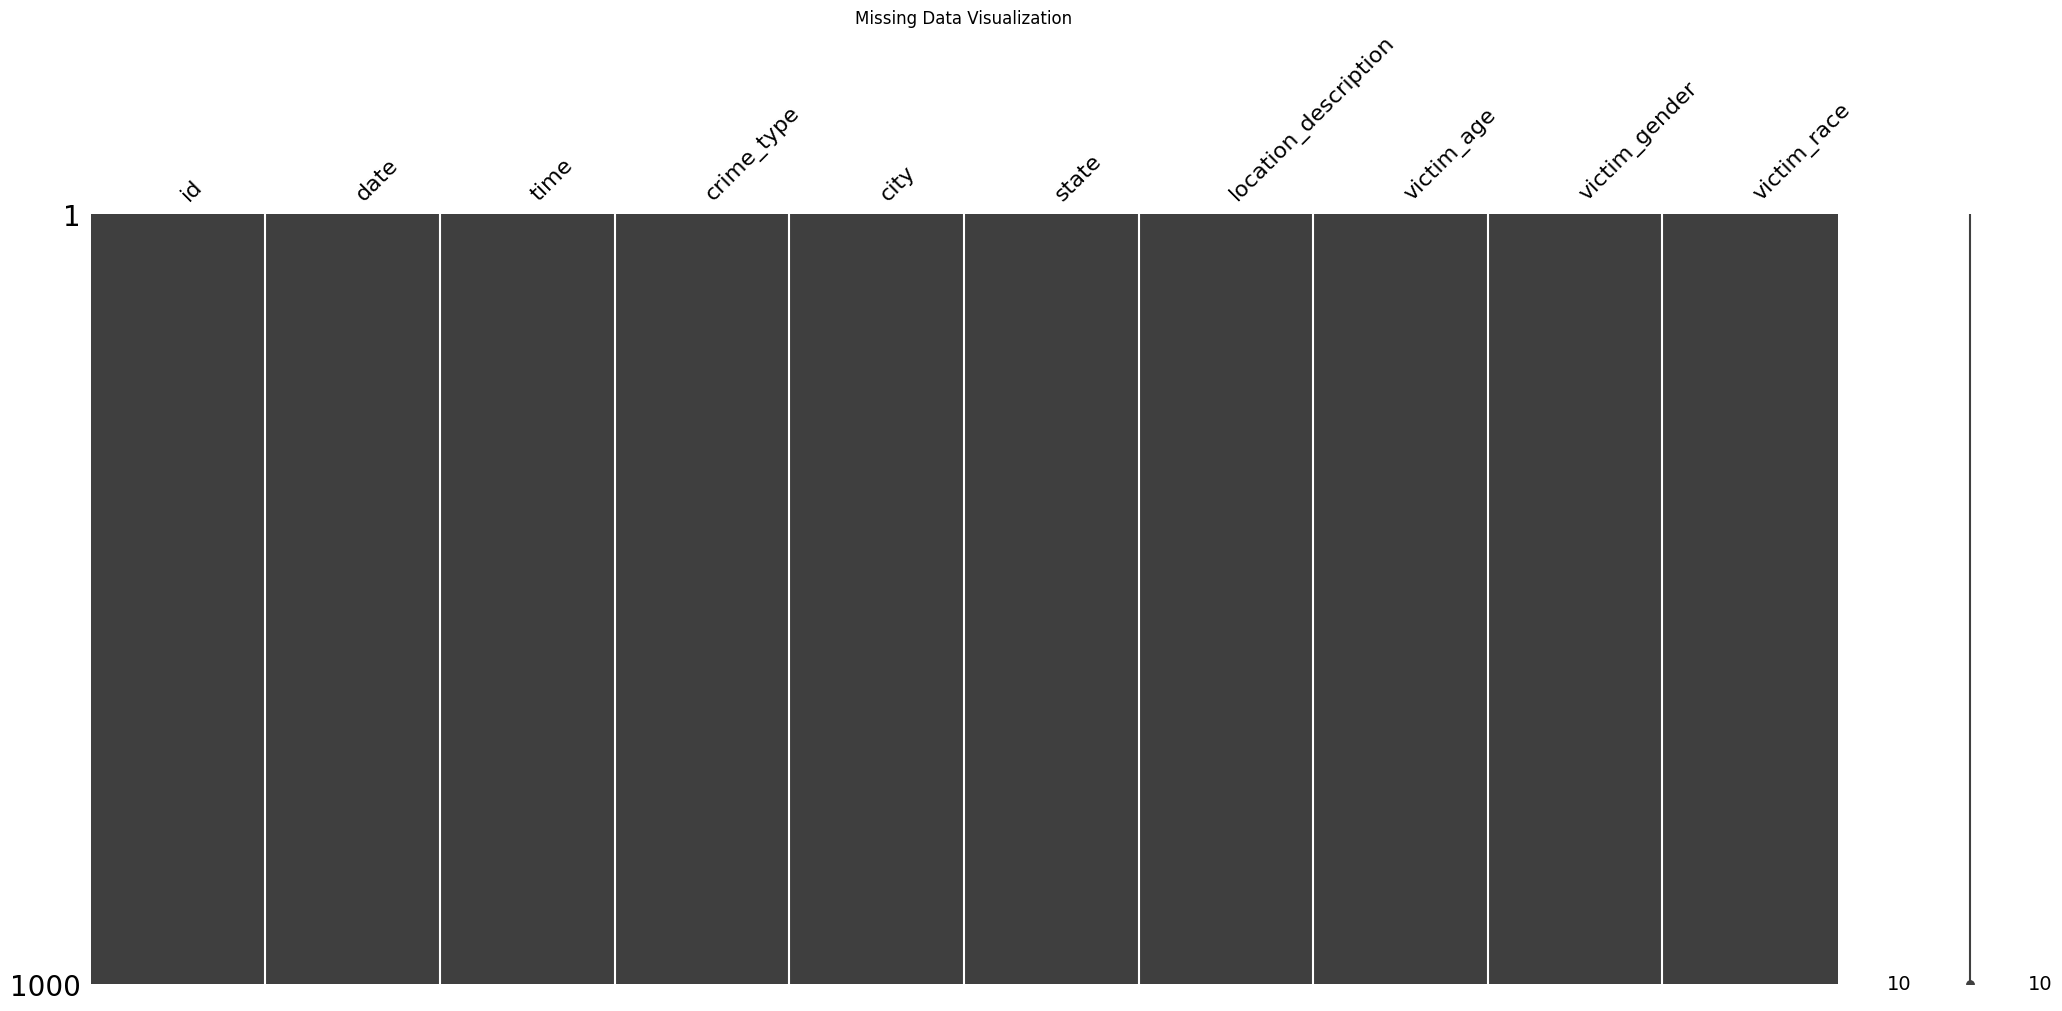

In [8]:
msno.matrix(df)
plt.title("Missing Data Visualization")
plt.show()

In [9]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek  # 0=Monday
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1000 non-null   int64         
 1   date                  1000 non-null   object        
 2   time                  1000 non-null   object        
 3   crime_type            1000 non-null   object        
 4   city                  1000 non-null   object        
 5   state                 1000 non-null   object        
 6   location_description  1000 non-null   object        
 7   victim_age            1000 non-null   int64         
 8   victim_gender         1000 non-null   object        
 9   victim_race           1000 non-null   object        
 10  datetime              1000 non-null   datetime64[ns]
 11  hour                  1000 non-null   int32         
 12  dayofweek             1000 non-null   int32         
 13  month              

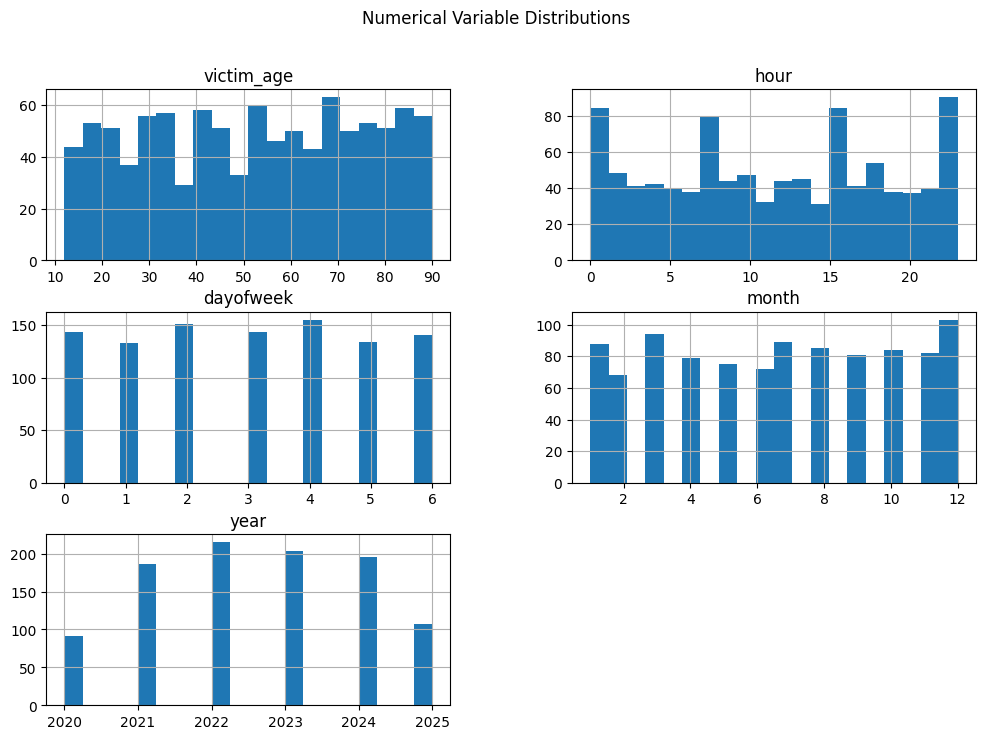

In [11]:
numeric_cols = ['victim_age', 'hour', 'dayofweek', 'month','year']
df[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Numerical Variable Distributions")
plt.show()

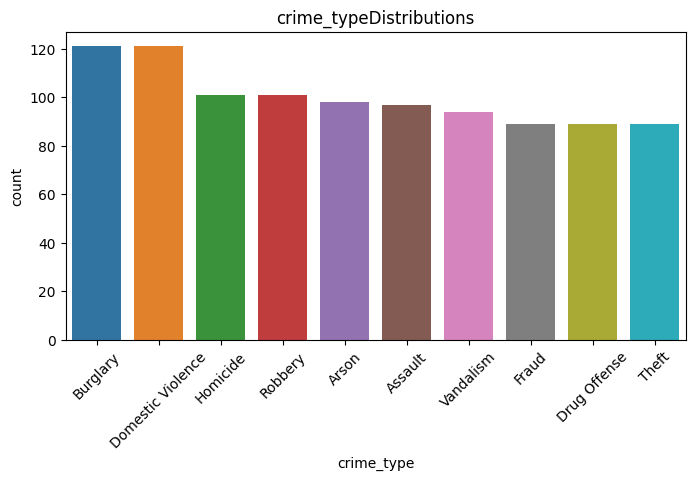

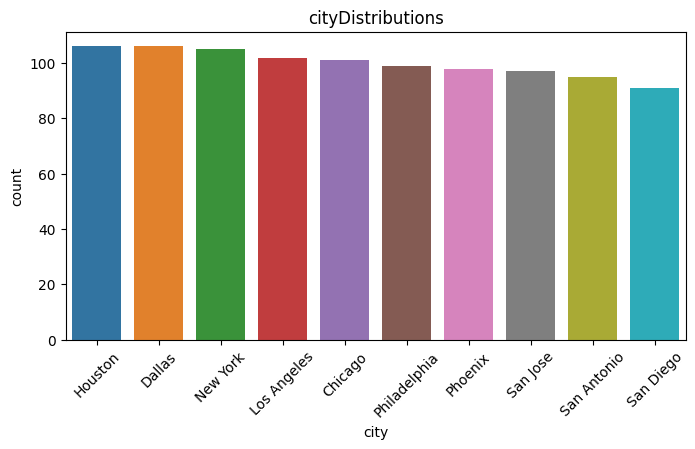

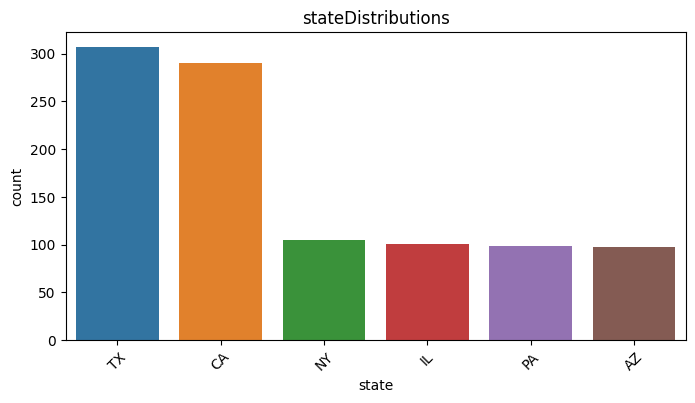

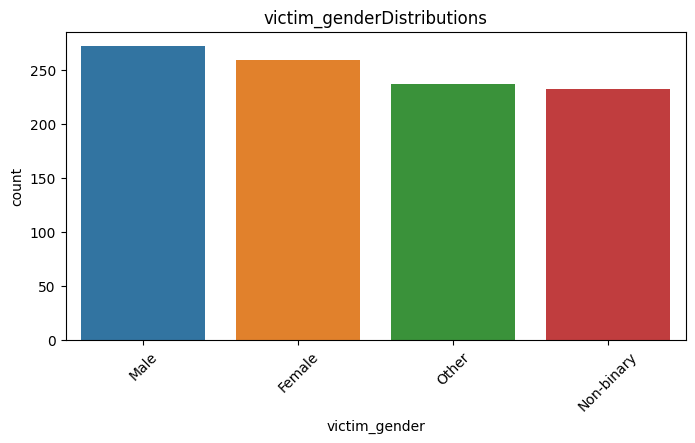

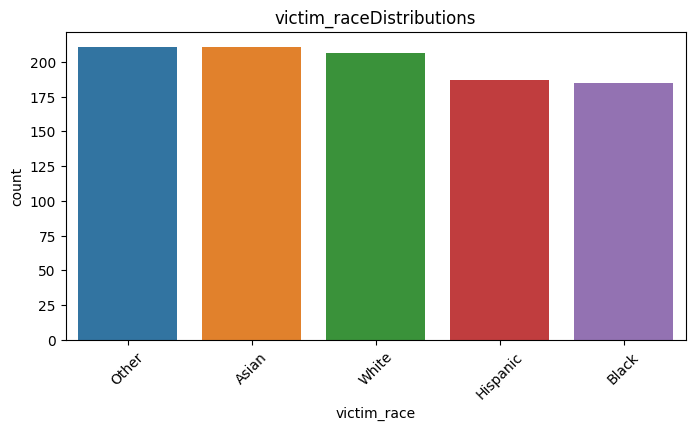

In [12]:
categorical_cols = ['crime_type', 'city', 'state', 'victim_gender', 'victim_race']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"{col}Distributions")
    plt.xticks(rotation=45)
    plt.show()

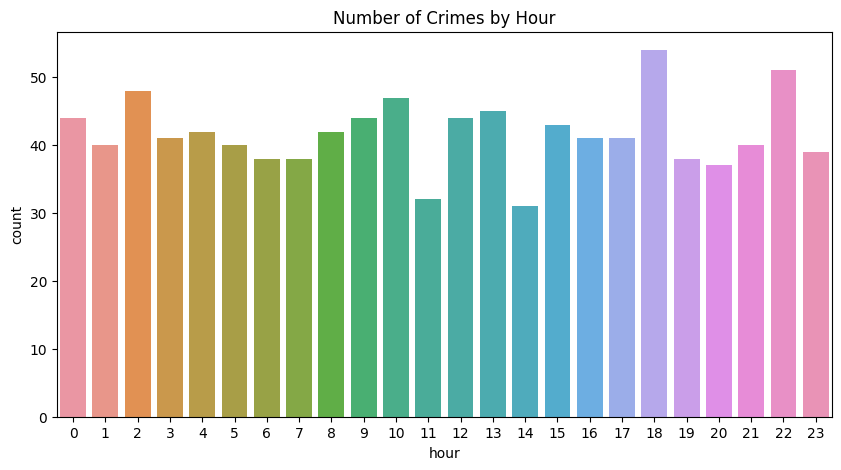

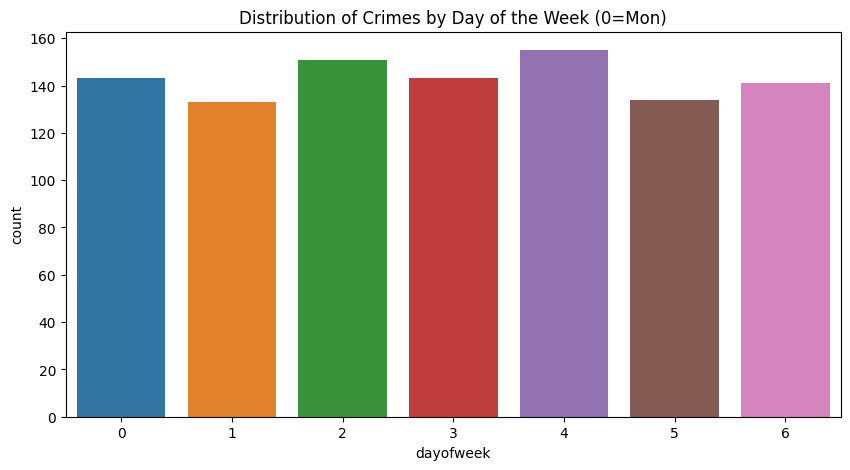

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x='hour', data=df)
plt.title("Number of Crimes by Hour")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='dayofweek', data=df)
plt.title("Distribution of Crimes by Day of the Week (0=Mon)")
plt.show()

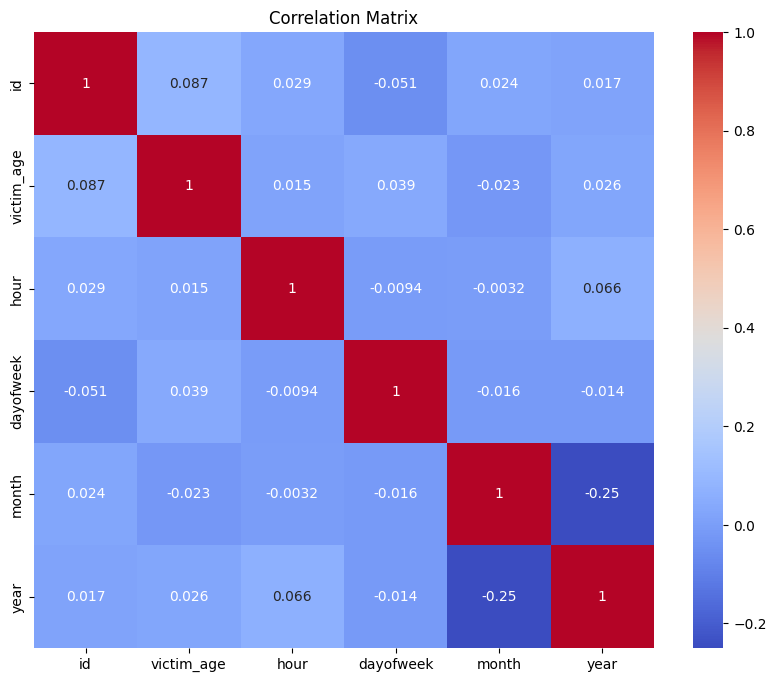

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

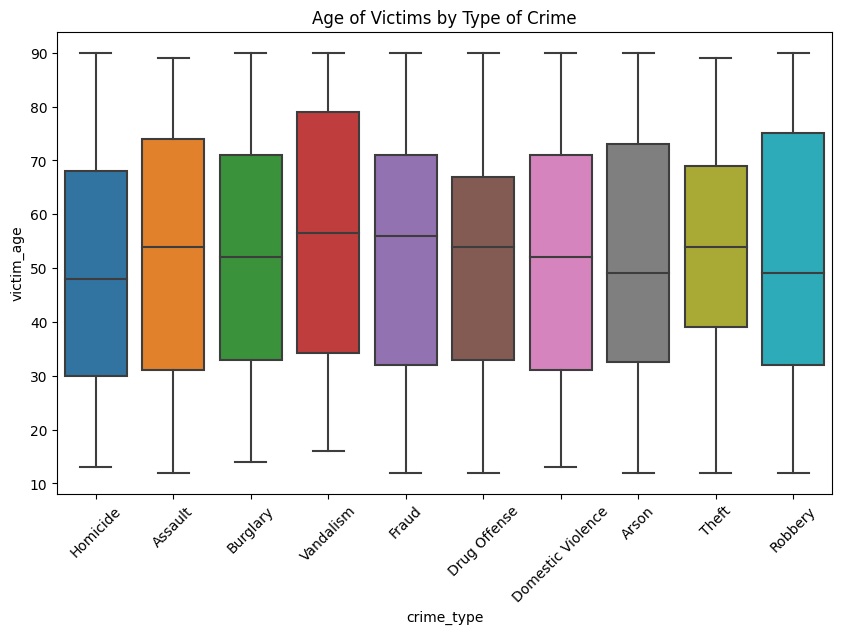

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='crime_type', y='victim_age', data=df)
plt.title("Age of Victims by Type of Crime")
plt.xticks(rotation=45)
plt.show()


In [16]:
df.groupby('crime_type')['victim_age'].describe()


,count,mean,std,min,25%,50%,75%,max
crime_type,,,,,,,,
Arson,98.0,52.142857,23.478878,12.0,32.50,49.0,73.0,90.0
Assault,97.0,52.515464,23.691645,12.0,31.00,54.0,74.0,89.0
Burglary,121.0,52.074380,23.558496,14.0,33.00,52.0,71.0,90.0
Domestic Violence,121.0,50.818182,23.004710,13.0,31.00,52.0,71.0,90.0
Drug Offense,89.0,51.033708,21.590428,12.0,33.00,54.0,67.0,90.0
Fraud,89.0,52.483146,21.993859,12.0,32.00,56.0,71.0,90.0
Homicide,101.0,49.475248,22.433722,13.0,30.00,48.0,68.0,90.0
Robbery,101.0,52.009901,24.018116,12.0,32.00,49.0,75.0,90.0
Theft,89.0,53.719101,21.303536,12.0,39.00,54.0,69.0,89.0


In [17]:
crime_ratios = df.groupby('city')['crime_type'].value_counts(normalize=True).unstack().fillna(0).round(2)
crime_totals = df['city'].value_counts()
crime_ratios['total_crimes'] = crime_totals
crime_ratios

crime_type,Arson,Assault,Burglary,Domestic Violence,Drug Offense,Fraud,Homicide,Robbery,Theft,Vandalism,total_crimes
city,,,,,,,,,,,
Chicago,0.04,0.09,0.14,0.13,0.09,0.13,0.09,0.10,0.09,0.11,101
Dallas,0.10,0.06,0.18,0.07,0.13,0.08,0.10,0.08,0.11,0.09,106
Houston,0.10,0.11,0.12,0.10,0.07,0.08,0.12,0.13,0.09,0.06,106
Los Angeles,0.11,0.16,0.09,0.17,0.05,0.06,0.11,0.09,0.07,0.11,102
New York,0.12,0.09,0.12,0.10,0.05,0.08,0.12,0.10,0.10,0.12,105
Philadelphia,0.10,0.07,0.12,0.08,0.14,0.13,0.11,0.05,0.10,0.09,99
Phoenix,0.11,0.06,0.13,0.11,0.06,0.09,0.10,0.13,0.08,0.11,98
San Antonio,0.09,0.08,0.05,0.16,0.11,0.13,0.04,0.13,0.13,0.08,95
San Diego,0.09,0.12,0.11,0.19,0.11,0.07,0.05,0.09,0.07,0.11,91


In [18]:
crime_counts = df.groupby('city')['crime_type'].value_counts().unstack().fillna(0).astype(int)
crime_counts['total_crimes'] = crime_counts.sum(axis=1)
crime_counts

crime_type,Arson,Assault,Burglary,Domestic Violence,Drug Offense,Fraud,Homicide,Robbery,Theft,Vandalism,total_crimes
city,,,,,,,,,,,
Chicago,4,9,14,13,9,13,9,10,9,11,101
Dallas,11,6,19,7,14,8,11,8,12,10,106
Houston,11,12,13,11,7,9,13,14,10,6,106
Los Angeles,11,16,9,17,5,6,11,9,7,11,102
New York,13,9,13,10,5,8,13,11,10,13,105
Philadelphia,10,7,12,8,14,13,11,5,10,9,99
Phoenix,11,6,13,11,6,9,10,13,8,11,98
San Antonio,9,8,5,15,10,12,4,12,12,8,95
San Diego,8,11,10,17,10,6,5,8,6,10,91


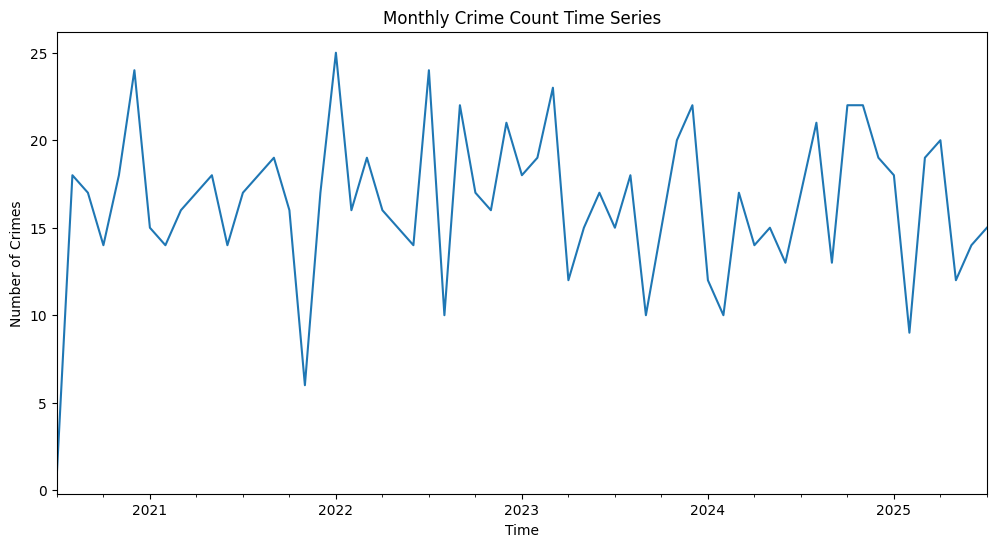

In [19]:
df.set_index('datetime', inplace=True)

plt.figure(figsize=(12, 6))
df['crime_type'].resample('M').count().plot()
plt.title("Monthly Crime Count Time Series")
plt.ylabel("Number of Crimes")
plt.xlabel("Time")
plt.show()



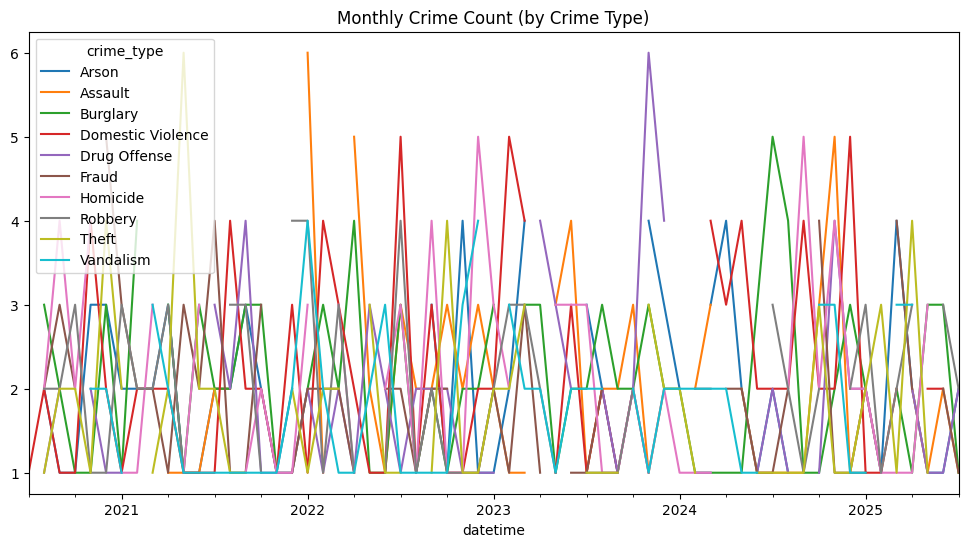

In [20]:
# If you want each type of crime to be drawn separately:
df.groupby([pd.Grouper(freq='M'), 'crime_type']).size().unstack().plot(figsize=(12,6))
plt.title("Monthly Crime Count (by Crime Type)")
plt.show()

In [21]:
df.head()

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race,hour,dayofweek,month,year
datetime,,,,,,,,,,,,,,
2022-09-09 18:58:57,1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other,18,4,9,2022
2022-07-10 12:10:59,2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black,12,6,7,2022
2024-12-31 09:26:12,3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian,9,1,12,2024
2024-04-12 23:17:28,4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian,23,4,4,2024
2023-07-19 04:49:39,5,2023-07-19,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26,Other,Other,4,2,7,2023


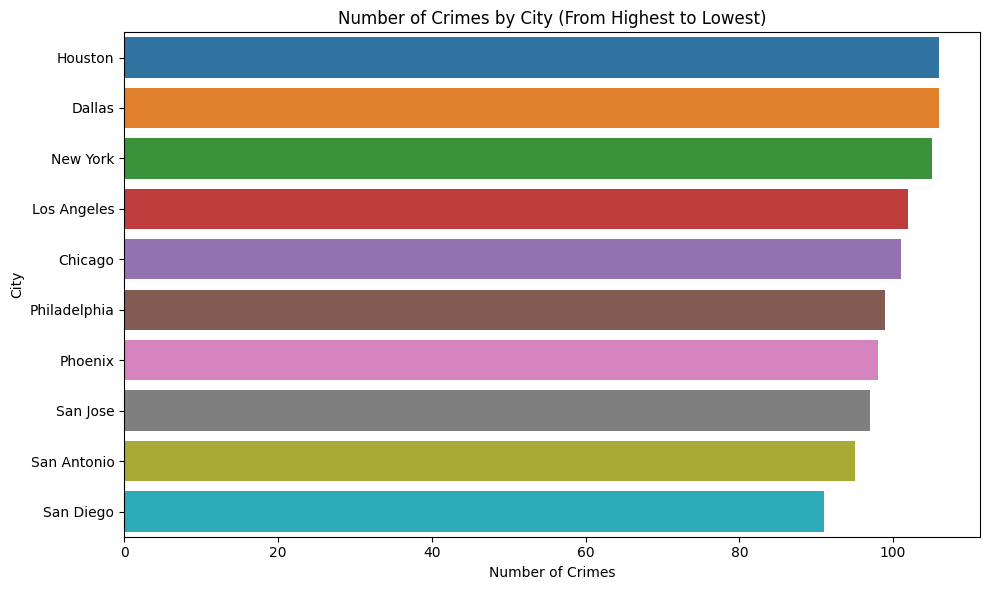

In [22]:
city_crime_counts = df['city'].value_counts()

# 2. Çizim
plt.figure(figsize=(10, 6))
sns.barplot(x=city_crime_counts.values, y=city_crime_counts.index, orient='h')  # yatay barlar
plt.title("Number of Crimes by City (From Highest to Lowest)")
plt.xlabel("Number of Crimes")
plt.ylabel("City")
plt.tight_layout()
plt.show()

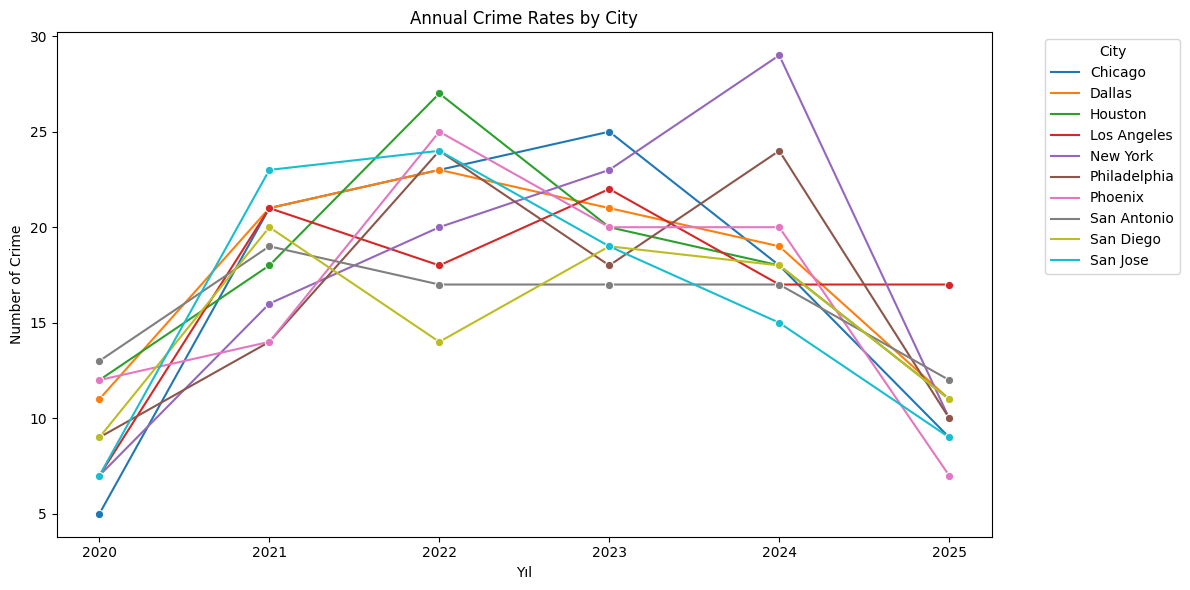

In [23]:
if 'datetime' not in df.columns:
    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

df['year'] = df['datetime'].dt.year

yearly_crime_by_city = df.groupby(['city', 'year']).size().reset_index(name='crime_count')


plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_crime_by_city, x='year', y='crime_count', hue='city', marker='o')

plt.title("Annual Crime Rates by City")
plt.xlabel("Yıl")
plt.ylabel("Number of Crime")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

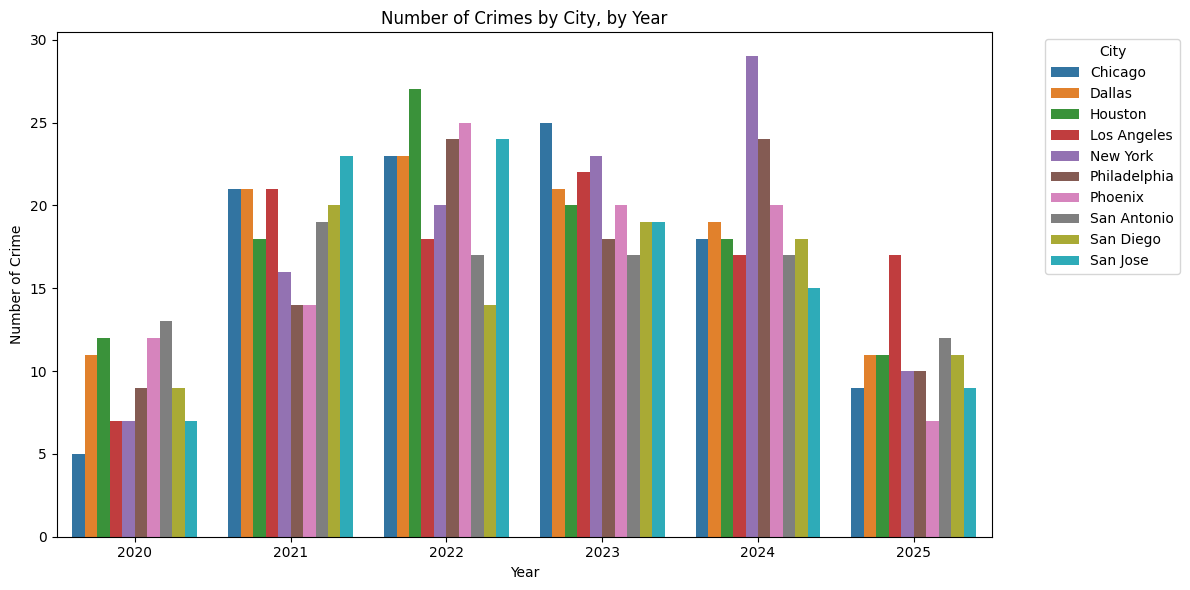

In [24]:
if 'datetime' not in df.columns:
    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

df['year'] = df['datetime'].dt.year

yearly_crime_by_city = df.groupby(['year', 'city']).size().reset_index(name='crime_count')

plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_crime_by_city, x='year', y='crime_count', hue='city')

plt.title("Number of Crimes by City, by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crime")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

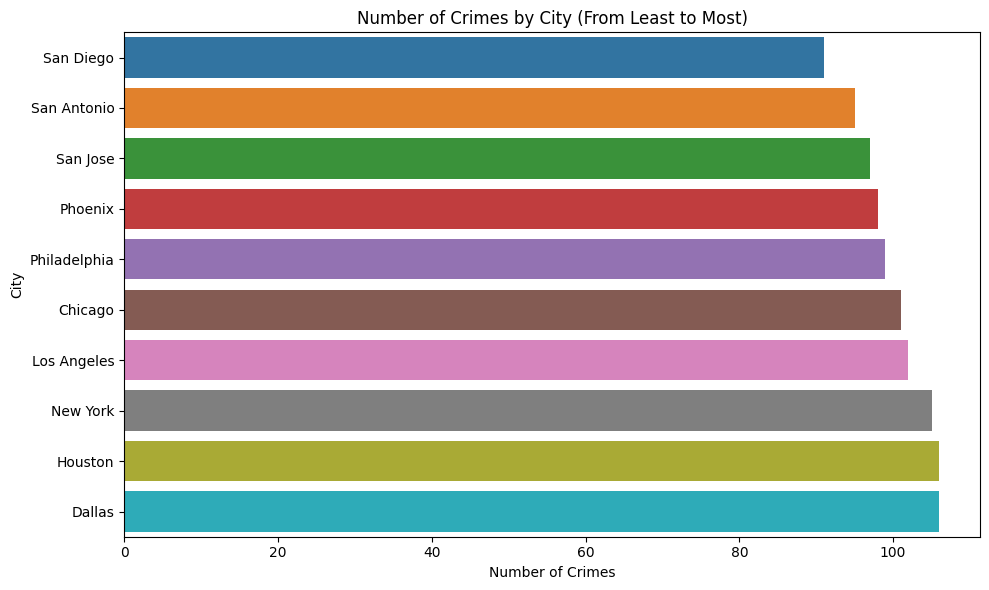

In [25]:
city_crime_counts = df['city'].value_counts().sort_values()  

plt.figure(figsize=(10, 6))
sns.barplot(x=city_crime_counts.values, y=city_crime_counts.index, orient='h')
plt.title("Number of Crimes by City (From Least to Most)")
plt.xlabel("Number of Crimes")
plt.ylabel("City")
plt.tight_layout()
plt.show()

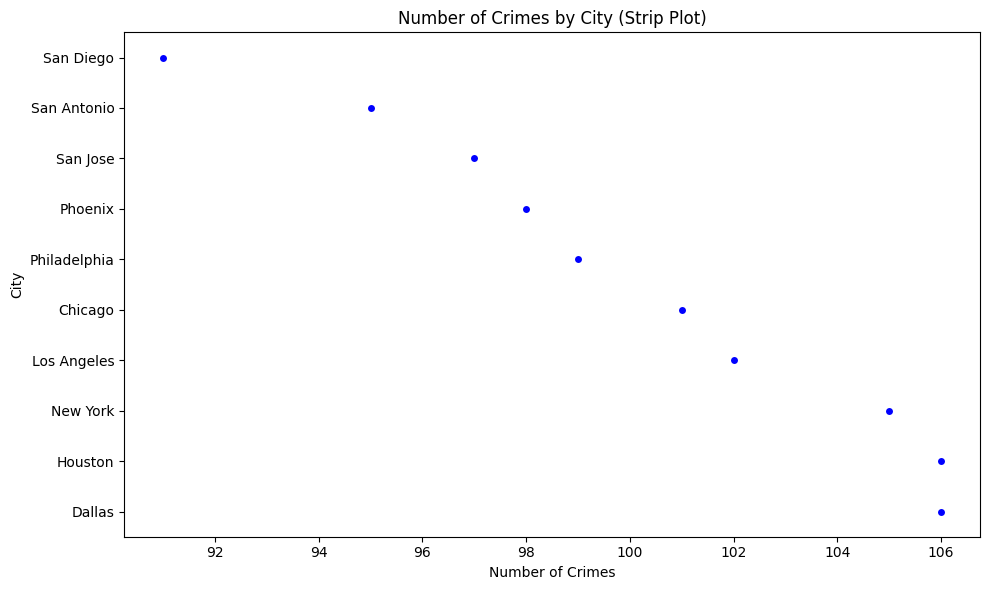

In [26]:
plt.figure(figsize=(10, 6))
sns.stripplot(x=city_crime_counts.values, y=city_crime_counts.index, color='blue')
plt.title("Number of Crimes by City (Strip Plot)")
plt.xlabel("Number of Crimes")
plt.ylabel("City")
plt.tight_layout()
plt.show()